## Implementing K-Nearest Neighbour Algorithm

### Import required dependecies

In [238]:
import numpy as np
import pandas as pd
import math
from scipy import stats as st
import matplotlib.pyplot as plt

# setting matplotlib plotting parameters
plt.rcdefaults()
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rc('font', family='serif')

## Classification

### Read csv data using pandas 

In [239]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [240]:
x = df['Glucose']
y = df['Outcome']

Text(0, 0.5, 'Frequency')

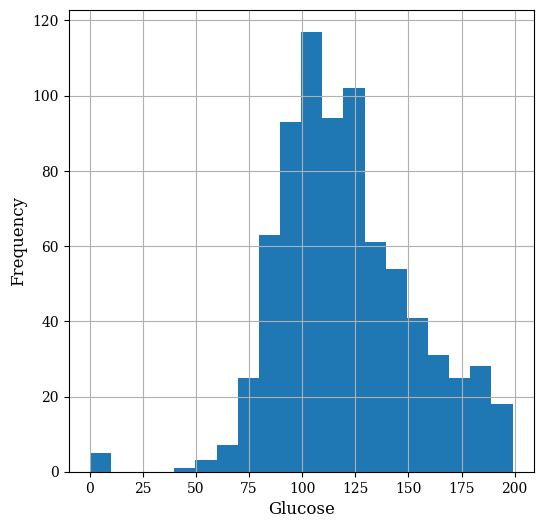

In [241]:
df['Glucose'].hist(bins= 20,figsize= (6, 6))
plt.xlabel('Glucose')
plt.ylabel('Frequency')

#### Data for which predict outcome

In [242]:
new_data_point = np.array([168])
new_data_point

array([168])

### Calculate euclidean distance

In [243]:
distance = [math.sqrt((x.values[i] - new_data_point)**2) for i in range(len(x.values))]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17512\4278582059.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distance = [math.sqrt((x.values[i] - new_data_point)**2) for i in range(len(x.values))]


In [244]:
distance = np.array(distance)        #convert list to array

### Define number of neighbor to be consider, k

In [245]:
k = 3                                         #number of neighbor. Minimun number of neighbor is 1 and maximum would be number of datapoints
nearest_idx = distance.argsort()[:k]          #sort value in asceding and consider first three index

In [246]:
out = np.array(y[nearest_idx])                 #outcomes for narest_idx 
out

array([1, 1, 1], dtype=int64)

In [247]:
classification = st.mode(out)
classification.mode

1

## Regression

### Load sample data

In [248]:
df_regression = pd.read_csv('https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv') 
df_regression.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### Plot sample data

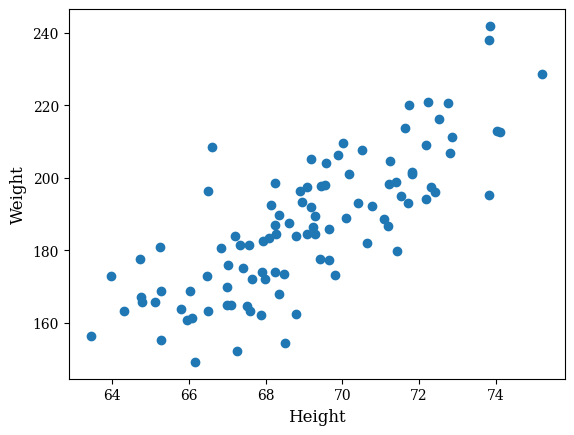

In [249]:
plt.scatter(df_regression['Height'][:100],df_regression['Weight'][:100])  
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [250]:
x = df_regression['Height']
y = df_regression['Weight']

### Take new_data_point

In [251]:
new_data_point = np.array([75])

### Calculate euclidien distance between new_data_point and x

In [252]:
distance = [math.sqrt((x.values[i] - new_data_point)**2) for i in range(len(x.values))]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17512\4278582059.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distance = [math.sqrt((x.values[i] - new_data_point)**2) for i in range(len(x.values))]


In [253]:
distance = np.array(distance)               #convert list to array

### Get nearest value 

In [254]:
k = 3                                         #number of neighbor. Minimun number of neighbor is 1 and maximum would be number of datapoints
nearest_idx = distance.argsort()[:k]          #sort value in asceding and consider first three index

### Average for regression

In [255]:
out = np.array(y[nearest_idx])                                #outcomes for narest_idx 
out = np.mean(out)                                            #Average for regression
out

232.43768193125368